In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
abalone = pd.read_csv('data/abalone.data')
abalone.head()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df = abalone['Gender']

x = pd.get_dummies(df)
x

,F,I,M
0,False,False,True
1,False,False,True
2,True,False,False
3,False,False,True
4,False,True,False
...,...,...,...
4172,True,False,False
4173,False,False,True
4174,False,False,True
4175,True,False,False


In [4]:
# Load dataset into a pandas DataFrame
from sklearn.model_selection import train_test_split


data = pd.read_csv("data/abalone.data")

# Handle missing values (if any)
#data = data.fillna(data.mean())  # Replace missing values with mean

# Split data into features (X) and target variable (y)
X = data.drop("Gender", axis=1)
y = data["Gender"]

# Convert categorical variables to numerical (if needed)
y = pd.get_dummies(y)  # One-hot encoding for categorical targets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train.values).float()
y_train = torch.tensor(y_train.values).float()
X_test = torch.tensor(X_test.values).float()
y_test = torch.tensor(y_test.values).float()


In [5]:
class MyModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyModel, self).__init__()
        self.linear1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(64, 32)  # Adjust for multi-class output
        self.output = nn.Linear(32, output_size)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.output(x)
        return x


In [40]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]  # For multiple classes

model = MyModel(input_size, output_size)
criterion = nn.CrossEntropyLoss() # Adjust loss for multi-class
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)


In [37]:
epoch_ = []
losses = []

In [41]:
# Set the model to training mode
model.train()

for epoch in range(10000):  # Adjust number of epochs
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.argmax(dim=1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_.append(epoch)
    losses.append(loss.item())

    if epoch==1 or epoch%10==0 or epoch==1000:
        print(f"Epoch {epoch+1}/{1000}, Loss: {loss.item():.4f}")


Epoch 1/1000, Loss: 1.1058
Epoch 2/1000, Loss: 1.0932
Epoch 11/1000, Loss: 1.0727
Epoch 21/1000, Loss: 1.0562
Epoch 31/1000, Loss: 1.0386
Epoch 41/1000, Loss: 1.0170
Epoch 51/1000, Loss: 0.9899
Epoch 61/1000, Loss: 0.9583
Epoch 71/1000, Loss: 0.9272
Epoch 81/1000, Loss: 0.9044
Epoch 91/1000, Loss: 0.8911
Epoch 101/1000, Loss: 0.8850
Epoch 111/1000, Loss: 0.8830
Epoch 121/1000, Loss: 0.8813
Epoch 131/1000, Loss: 0.8798
Epoch 141/1000, Loss: 0.8779
Epoch 151/1000, Loss: 0.8763
Epoch 161/1000, Loss: 0.8750
Epoch 171/1000, Loss: 0.8736
Epoch 181/1000, Loss: 0.8722
Epoch 191/1000, Loss: 0.8707
Epoch 201/1000, Loss: 0.8696
Epoch 211/1000, Loss: 0.8684
Epoch 221/1000, Loss: 0.8672
Epoch 231/1000, Loss: 0.8661
Epoch 241/1000, Loss: 0.8649
Epoch 251/1000, Loss: 0.8638
Epoch 261/1000, Loss: 0.8627
Epoch 271/1000, Loss: 0.8615
Epoch 281/1000, Loss: 0.8604
Epoch 291/1000, Loss: 0.8593
Epoch 301/1000, Loss: 0.8582
Epoch 311/1000, Loss: 0.8571
Epoch 321/1000, Loss: 0.8560
Epoch 331/1000, Loss: 0.854

In [33]:
# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    predictions = model(X_test)
    correct = (predictions.argmax(dim=1) == y_test.argmax(dim=1)).sum().item()
    accuracy = correct / len(y_test)
    print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 0.5670


In [126]:
new_data = torch.tensor([[0.9, 0.3, 0.5, 0.9, 0.9, 0.1, 0.9, 0.15]]).float()
model.eval()
with torch.no_grad():
    prediction = model(new_data)
    predicted_gender = prediction.argmax(dim=1).item()  # Get the predicted class
    print(f"Predicted {predicted_gender}")

Predicted 1


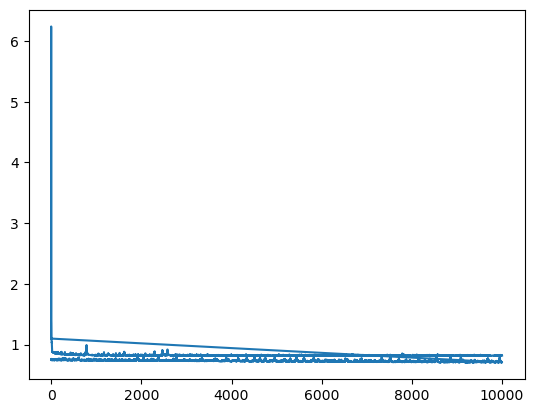

In [27]:
plt.plot(epoch_, losses)

In [128]:
a = 43
b = 11


In [136]:
%%time
c = a * b
c

CPU times: total: 0 ns
Wall time: 0 ns


473

In [135]:
%%time
aa = str(a)
bb = str(b)

cc = f'{aa[0]}{int(aa[0])+int(aa[-1])}{aa[-1]}'
int(cc)

CPU times: total: 0 ns
Wall time: 0 ns


473